In [98]:
import numpy as np
import os
import torch
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

In [581]:
data_dir = "./aclImdb/"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
TRAIN_SIZE = 20000
VALIDATION_SIZE = 5000
TEST_SIZE = 25000
accuracy_dict = {'1 gram':[],'2 gram':[],'3 gram':[],'4 gram':[]}

In [764]:
def read_file(file_name):
    with open(file_name, "r") as f:
        content = f.read()
        content = content.lower().replace("<br />", "")
    return content

def load_dataset(dataset_dir, dataset_size, initial=0):
    pos_dir = os.path.join(dataset_dir, "pos")
    neg_dir = os.path.join(dataset_dir, "neg")
    single_label_size = int(dataset_size / 2)
    dataset = []
    target = []
    all_pos = os.listdir(pos_dir)
    all_neg = os.listdir(neg_dir)
    for i in range(initial, initial+single_label_size):
        dataset.append(read_file(os.path.join(pos_dir, all_pos[i])))
        target.append(1)
        dataset.append(read_file(os.path.join(neg_dir, all_neg[i])))
        target.append(0)
    return dataset, target

In [765]:
train_data = load_dataset(train_dir, TRAIN_SIZE)[0]
train_targets = load_dataset(train_dir, TRAIN_SIZE)[1]
validation_data = load_dataset(train_dir, VALIDATION_SIZE, initial=int(TRAIN_SIZE/2))[0]
validation_targets = load_dataset(train_dir, VALIDATION_SIZE, initial=int(TRAIN_SIZE/2))[1]
test_data = load_dataset(test_dir, TEST_SIZE)[0]
test_targets = load_dataset(test_dir, TEST_SIZE)[1]

In [10]:
import random
a = random.randint(0, len(train_data) - 1)
print (train_data[a])
print (train_targets[a])

this is a truly wretched little film. admittedly the original (un)holy trinity was governed by the law of diminishing returns with the third, "the final conflict" degenerating into a ridiculous sub-plot about half-way through the film apparently merely to provide the requisite needlessly convoluted deaths that had by now become the whole raison d'etre for the "omen" series. but then to foist this jumped-up tv movie (beware purchasers of the omen box set on dvd - don't be fooled by the widescreen ratio of the transfer, this was and is strictly small-screen stuff) on the back of a series of generally fine demonic chillers was unforgivable, particularly, endorsed as it was, by the exec.producer and producer of the first three movies mace neufeld and harvey bernhard. i'd give-away the plot if there was any, besides the usual death scenes (hopelessly toned down for tv sensibilities) and some of the worst acting i've seen. all involved in this project down to the catering people should be as

In [766]:
import spacy
import string

tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

def tokenize(sent):
  tokens = tokenizer(sent)
  return [token.text.lower() for token in tokens if (token.text not in punctuations)]

# Example
tokens = tokenize(train_data[a])
print (tokens)

['this', 'is', 'a', 'truly', 'wretched', 'little', 'film', 'admittedly', 'the', 'original', 'un)holy', 'trinity', 'was', 'governed', 'by', 'the', 'law', 'of', 'diminishing', 'returns', 'with', 'the', 'third', 'the', 'final', 'conflict', 'degenerating', 'into', 'a', 'ridiculous', 'sub', 'plot', 'about', 'half', 'way', 'through', 'the', 'film', 'apparently', 'merely', 'to', 'provide', 'the', 'requisite', 'needlessly', 'convoluted', 'deaths', 'that', 'had', 'by', 'now', 'become', 'the', 'whole', 'raison', "d'etre", 'for', 'the', 'omen', 'series', 'but', 'then', 'to', 'foist', 'this', 'jumped', 'up', 'tv', 'movie', 'beware', 'purchasers', 'of', 'the', 'omen', 'box', 'set', 'on', 'dvd', 'do', "n't", 'be', 'fooled', 'by', 'the', 'widescreen', 'ratio', 'of', 'the', 'transfer', 'this', 'was', 'and', 'is', 'strictly', 'small', 'screen', 'stuff', 'on', 'the', 'back', 'of', 'a', 'series', 'of', 'generally', 'fine', 'demonic', 'chillers', 'was', 'unforgivable', 'particularly', 'endorsed', 'as', 'i

In [20]:
t = np.argmax([len(train_data[i].split())for i in range(20000)])
print(t)
print(len(train_data[t]))

m = np.mean([len(train_data[i].split())for i in range(20000)])
print (m)

3692
13584
229.56285


In [585]:
def find_ngrams(input_list, n): #input_list is a list of single tokens
    result = []
    result += list(zip(*[input_list[j:] for j in range(n)]))
    return result

def tokenize_dataset(dataset, n):
    token_dataset = []
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        ngrams = find_ngrams(tokens,n)
        new_tokens = [" ".join(list(i)) for i in ngrams]
        token_dataset.append(new_tokens)
        all_tokens += new_tokens

    return token_dataset, all_tokens

In [589]:
import pickle as pkl

n = 4

print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data,n)
pkl.dump(all_train_tokens, open("all_train_tokens_" + str(n) + ".p", "wb"))
pkl.dump(train_data_tokens, open("train_data_tokens_" + str(n) + ".p", "wb"))

print ("Tokenizing validation data")
validation_data_tokens, _ = tokenize_dataset(validation_data,n)
pkl.dump(validation_data_tokens, open("validation_data_tokens_" + str(n) + ".p", "wb"))

print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data,n)
pkl.dump(test_data_tokens, open("test_data_tokens_" + str(n) + ".p", "wb"))

Tokenizing train data
Tokenizing validation data
Tokenizing test data


In [767]:
n = 1

train_data_tokens = pkl.load(open("train_data_tokens_" + str(n) + ".p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens_" + str(n) + ".p", "rb"))
validation_data_tokens = pkl.load(open("validation_data_tokens_" + str(n) + ".p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens_" + str(n) + ".p", "rb"))

In [642]:
print(train_data_tokens[0])

['for a movie that', 'a movie that gets', 'movie that gets no', 'that gets no respect', 'gets no respect there', 'no respect there sure', 'respect there sure are', 'there sure are a', 'sure are a lot', 'are a lot of', 'a lot of memorable', 'lot of memorable quotes', 'of memorable quotes listed', 'memorable quotes listed for', 'quotes listed for this', 'listed for this gem', 'for this gem imagine', 'this gem imagine a', 'gem imagine a movie', 'imagine a movie where', 'a movie where joe', 'movie where joe piscopo', 'where joe piscopo is', 'joe piscopo is actually', 'piscopo is actually funny', 'is actually funny maureen', 'actually funny maureen stapleton', 'funny maureen stapleton is', 'maureen stapleton is a', 'stapleton is a scene', 'is a scene stealer', 'a scene stealer the', 'scene stealer the moroni', 'stealer the moroni character', 'the moroni character is', 'moroni character is an', 'character is an absolute', 'is an absolute scream', 'an absolute scream watch', 'absolute scream 

In [768]:
# (some of the) hyper parameters
BATCH_SIZE = 32
emb_dim = 300 # dimension for n-gram embedding
learning_rate = 0.05
num_epochs = 5 # number of epochs to train
max_vocab_size = 10000

In [769]:
from collections import Counter
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [645]:
print(id2token[:100])

['<pad>', '<unk>', 'is one of the', 'the rest of the', 'one of the most', 'the end of the', 'one of the best', "i do n't know", 'this is one of', 'i have ever seen', "i do n't think", 'at the same time', "i 've ever seen", 'one of the worst', 'at the end of', 'if you want to', 'of the film is', 'was one of the', 'of the movie is', 'in the middle of', 'this movie is a', 'is supposed to be', 'is one of those', "if you do n't", 'the fact that the', 'i have to say', 'on the other hand', 'for the first time', 'for the most part', 'end of the movie', 'rest of the cast', 'i saw this movie', "it 's hard to", 'as one of the', 'the beginning of the', "do n't want to", 'end of the film', 'you want to see', 'to do with the', 'i thought it was', "i 'm not sure", 'a lot of the', 'one of my favorite', 'supposed to be a', 'it could have been', "do n't waste your", 'this is not a', 'be one of the', 'as well as the', 'in the first place', 'the fact that it', 'it would have been', 'to see this movie', 't

In [646]:
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print(len(id2token))

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

10002
Token id 2438 ; token of the most interesting
Token of the most interesting; token id 2438


In [770]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
validation_data_indices = token2index_dataset(validation_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Validation dataset size is {}".format(len(validation_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Validation dataset size is 5000
Test dataset size is 25000


In [107]:
print(train_data_indices[a])

[11, 7, 4, 362, 5362, 119, 20, 3225, 2, 198, 1, 1, 14, 1, 34, 2, 1117, 5, 1, 1669, 17, 2, 826, 2, 470, 1896, 1, 82, 4, 620, 1479, 115, 45, 315, 98, 144, 2, 20, 660, 1462, 6, 1694, 2, 1, 8282, 3616, 2399, 12, 68, 34, 156, 403, 2, 220, 1, 1, 16, 2, 5194, 197, 19, 97, 6, 1, 11, 4374, 56, 239, 18, 5722, 1, 5, 2, 5194, 929, 262, 22, 278, 44, 23, 29, 4628, 34, 2, 5642, 8232, 5, 2, 4795, 11, 14, 3, 7, 3319, 374, 270, 538, 22, 2, 143, 5, 4, 197, 5, 1199, 483, 5735, 1, 14, 9944, 563, 1, 15, 9, 14, 34, 2, 1, 3, 1378, 5, 2, 90, 272, 102, 1, 1, 3, 4644, 1, 10, 305, 199, 243, 2, 115, 49, 41, 14, 100, 1531, 2, 631, 339, 137, 5225, 7632, 186, 16, 239, 8841, 3, 50, 5, 2, 242, 120, 10, 142, 112, 32, 560, 8, 11, 1194, 186, 6, 2, 1, 83, 133, 29, 2923, 11, 5021, 124, 94, 9, 6, 2, 270, 284, 575, 1, 442, 2, 5194, 393, 49, 30, 401, 7, 2335, 34, 62, 753, 6, 845, 11, 968, 10, 238, 228, 128, 16, 9]


In [771]:
import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

    
MAX_SENTENCE_LENGTH = 250   
    
def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(validation_data_indices, validation_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

In [772]:
import torch.nn as nn
import torch.nn.functional as F

class BagOfNGram(nn.Module):
    """
    BagOfNGram classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfNGram, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

model = BagOfNGram(len(id2token), emb_dim)

In [606]:
gram_dict={'1':[],'2':[],'3':[],'4':[]}

In [773]:
# Criterion and Optimizer
model = BagOfNGram(len(id2token), emb_dim)
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)


accuracy_dict[str(n) + ' gram'] = []
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        if i % 100 == 0:
            gram_dict[str(n)].append(loss.item())
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
            accuracy_dict[str(n) + ' gram'].append(val_acc)
            
# plt.plot(loss_dict['1 gram'])
# plt.show()

Epoch: [1/5], Step: [101/625], Validation Acc: 82.94
Epoch: [1/5], Step: [201/625], Validation Acc: 84.14
Epoch: [1/5], Step: [301/625], Validation Acc: 84.78
Epoch: [1/5], Step: [401/625], Validation Acc: 85.18
Epoch: [1/5], Step: [501/625], Validation Acc: 84.3
Epoch: [1/5], Step: [601/625], Validation Acc: 85.96
Epoch: [2/5], Step: [101/625], Validation Acc: 85.26
Epoch: [2/5], Step: [201/625], Validation Acc: 83.86
Epoch: [2/5], Step: [301/625], Validation Acc: 85.6
Epoch: [2/5], Step: [401/625], Validation Acc: 84.12
Epoch: [2/5], Step: [501/625], Validation Acc: 84.84
Epoch: [2/5], Step: [601/625], Validation Acc: 83.28
Epoch: [3/5], Step: [101/625], Validation Acc: 84.9
Epoch: [3/5], Step: [201/625], Validation Acc: 83.66
Epoch: [3/5], Step: [301/625], Validation Acc: 84.68
Epoch: [3/5], Step: [401/625], Validation Acc: 85.04
Epoch: [3/5], Step: [501/625], Validation Acc: 85.2
Epoch: [3/5], Step: [601/625], Validation Acc: 85.64
Epoch: [4/5], Step: [101/625], Validation Acc: 84.

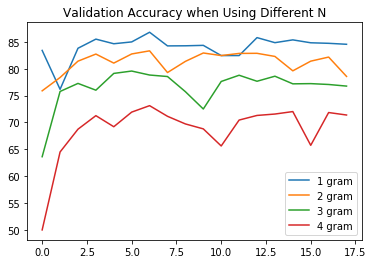

In [651]:
plt.plot(accuracy_dict['1 gram'], label='1 gram')
plt.plot(accuracy_dict['2 gram'], label='2 gram')
plt.plot(accuracy_dict['3 gram'], label='3 gram')
plt.plot(accuracy_dict['4 gram'], label='4 gram')
plt.title('Validation Accuracy when Using Different N')
plt.legend()
plt.show()

# Tuning the Parameters

## Model parameters

In [661]:
n = 1

train_data_tokens = pkl.load(open("train_data_tokens_" + str(n) + ".p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens_" + str(n) + ".p", "rb"))
validation_data_tokens = pkl.load(open("validation_data_tokens_" + str(n) + ".p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens_" + str(n) + ".p", "rb"))

In [703]:
# BATCH_SIZE = 32
emb_dim = 100 # dimension for n-gram embedding
learning_rate = 0.05
num_epochs = 5 # number of epochs to train
max_vocab_size = 10000

# loss_emb_10000 = {'100':[],'300':[]}
# loss_emb_20000 = {'100':[],'300':[]}

In [704]:
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
validation_data_indices = token2index_dataset(validation_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)


In [705]:
len(id2token)

10002

In [706]:
class IMDBDataset(Dataset):
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

    
MAX_SENTENCE_LENGTH = 250   
    
def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(validation_data_indices, validation_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

In [707]:
class BagOfNGram(nn.Module):
    """
    BagOfNGram classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfNGram, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out


In [700]:
model = BagOfNGram(len(id2token), emb_dim)
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)


for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        if i % 32 == 0:
            loss_emb_20000[str(emb_dim)].append(loss.item())
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: [1/3], Step: [101/625], Validation Acc: 83.02
Epoch: [1/3], Step: [201/625], Validation Acc: 85.16
Epoch: [1/3], Step: [301/625], Validation Acc: 84.72
Epoch: [1/3], Step: [401/625], Validation Acc: 86.16
Epoch: [1/3], Step: [501/625], Validation Acc: 84.96
Epoch: [1/3], Step: [601/625], Validation Acc: 84.28
Epoch: [2/3], Step: [101/625], Validation Acc: 85.62
Epoch: [2/3], Step: [201/625], Validation Acc: 84.94
Epoch: [2/3], Step: [301/625], Validation Acc: 86.52
Epoch: [2/3], Step: [401/625], Validation Acc: 86.62
Epoch: [2/3], Step: [501/625], Validation Acc: 84.34
Epoch: [2/3], Step: [601/625], Validation Acc: 85.36
Epoch: [3/3], Step: [101/625], Validation Acc: 84.96
Epoch: [3/3], Step: [201/625], Validation Acc: 83.98
Epoch: [3/3], Step: [301/625], Validation Acc: 86.12
Epoch: [3/3], Step: [401/625], Validation Acc: 85.14
Epoch: [3/3], Step: [501/625], Validation Acc: 85.08
Epoch: [3/3], Step: [601/625], Validation Acc: 84.84


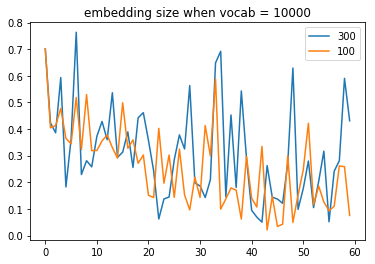

In [673]:
plt.plot(loss_emb_10000['300'], label = '300')
plt.plot(loss_emb_10000['100'], label = '100')
plt.title('embedding size when vocab = 10000')
plt.legend()
plt.show()

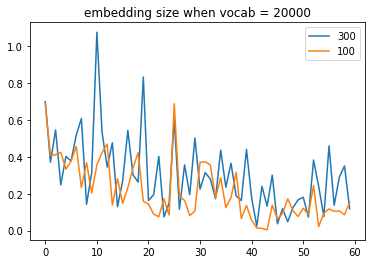

In [701]:
plt.plot(loss_emb_20000['300'], label = '300')
plt.plot(loss_emb_20000['100'], label = '100')
plt.title('embedding size when vocab = 20000')
plt.legend()
plt.show()

## Learning Rate and Optimization

In [702]:
SGD_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}
Adam_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}
RMS_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}

In [728]:
SGD_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}
lr_list = [0.1,0.05,0.01,0.005]
criterion = torch.nn.CrossEntropyLoss()  

for lr in lr_list:
    model = BagOfNGram(len(id2token), emb_dim)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            if i%64 == 0:
                SGD_dict[str(lr)].append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))

Lr: 0.1, Epoch: [1/3], Step: [601/625], Validation Acc: 66.32
Lr: 0.1, Epoch: [2/3], Step: [601/625], Validation Acc: 67.76
Lr: 0.1, Epoch: [3/3], Step: [601/625], Validation Acc: 68.42
Lr: 0.05, Epoch: [1/3], Step: [601/625], Validation Acc: 62.72
Lr: 0.05, Epoch: [2/3], Step: [601/625], Validation Acc: 64.5
Lr: 0.05, Epoch: [3/3], Step: [601/625], Validation Acc: 65.5
Lr: 0.01, Epoch: [1/3], Step: [601/625], Validation Acc: 56.6
Lr: 0.01, Epoch: [2/3], Step: [601/625], Validation Acc: 62.92
Lr: 0.01, Epoch: [3/3], Step: [601/625], Validation Acc: 65.28
Lr: 0.005, Epoch: [1/3], Step: [601/625], Validation Acc: 52.56
Lr: 0.005, Epoch: [2/3], Step: [601/625], Validation Acc: 56.6
Lr: 0.005, Epoch: [3/3], Step: [601/625], Validation Acc: 58.46


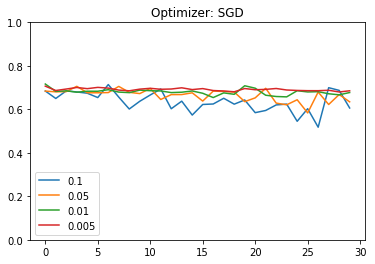

In [729]:
plt.plot(SGD_dict['0.1'], label='0.1')
plt.plot(SGD_dict['0.05'], label='0.05')
plt.plot(SGD_dict['0.01'], label='0.01')
plt.plot(SGD_dict['0.005'], label='0.005')
plt.ylim(0,1)
plt.legend()
plt.title('Optimizer: SGD')
plt.show()

In [713]:
Adam_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}

In [714]:
lr_list = [0.1,0.05,0.01,0.005]
num_epochs = 3
criterion = torch.nn.CrossEntropyLoss()  

for lr in lr_list:
    model = BagOfNGram(len(id2token), emb_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            if i%64 == 0:
                Adam_dict[str(lr)].append(loss.data[0])
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Lr: 0.1, Epoch: [1/3], Step: [601/625], Validation Acc: 85.36
Lr: 0.1, Epoch: [2/3], Step: [601/625], Validation Acc: 85.34
Lr: 0.1, Epoch: [3/3], Step: [601/625], Validation Acc: 83.54
Lr: 0.05, Epoch: [1/3], Step: [601/625], Validation Acc: 85.32
Lr: 0.05, Epoch: [2/3], Step: [601/625], Validation Acc: 83.2
Lr: 0.05, Epoch: [3/3], Step: [601/625], Validation Acc: 85.96
Lr: 0.01, Epoch: [1/3], Step: [601/625], Validation Acc: 87.24
Lr: 0.01, Epoch: [2/3], Step: [601/625], Validation Acc: 86.84
Lr: 0.01, Epoch: [3/3], Step: [601/625], Validation Acc: 85.58
Lr: 0.005, Epoch: [1/3], Step: [601/625], Validation Acc: 86.82
Lr: 0.005, Epoch: [2/3], Step: [601/625], Validation Acc: 87.18
Lr: 0.005, Epoch: [3/3], Step: [601/625], Validation Acc: 87.14


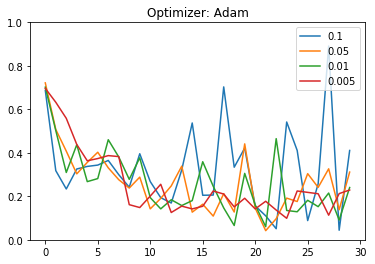

In [722]:
plt.plot(Adam_dict['0.1'], label='0.1')
plt.plot(Adam_dict['0.05'], label='0.05')
plt.plot(Adam_dict['0.01'], label='0.01')
plt.plot(Adam_dict['0.005'], label='0.005')
plt.title('Optimizer: Adam')
plt.ylim(0,1)
plt.legend()
plt.show()

In [716]:
RMS_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}

lr_list = [0.1,0.05,0.01,0.005]
num_epochs = 3
criterion = torch.nn.CrossEntropyLoss()  

for lr in lr_list:
    model = BagOfNGram(len(id2token), emb_dim)
    optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            if i%64 == 0:
                RMS_dict[str(lr)].append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))

Lr: 0.1, Epoch: [1/3], Step: [601/625], Validation Acc: 85.92
Lr: 0.1, Epoch: [2/3], Step: [601/625], Validation Acc: 85.26
Lr: 0.1, Epoch: [3/3], Step: [601/625], Validation Acc: 86.38
Lr: 0.05, Epoch: [1/3], Step: [601/625], Validation Acc: 86.88
Lr: 0.05, Epoch: [2/3], Step: [601/625], Validation Acc: 85.64
Lr: 0.05, Epoch: [3/3], Step: [601/625], Validation Acc: 86.38
Lr: 0.01, Epoch: [1/3], Step: [601/625], Validation Acc: 86.7
Lr: 0.01, Epoch: [2/3], Step: [601/625], Validation Acc: 87.0
Lr: 0.01, Epoch: [3/3], Step: [601/625], Validation Acc: 86.86
Lr: 0.005, Epoch: [1/3], Step: [601/625], Validation Acc: 87.28
Lr: 0.005, Epoch: [2/3], Step: [601/625], Validation Acc: 88.14
Lr: 0.005, Epoch: [3/3], Step: [601/625], Validation Acc: 87.48


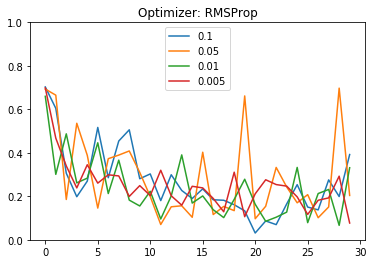

In [723]:
plt.plot(RMS_dict['0.1'], label='0.1')
plt.plot(RMS_dict['0.05'], label='0.05')
plt.plot(RMS_dict['0.01'], label='0.01')
plt.plot(RMS_dict['0.005'], label='0.005')
plt.ylim(0,1)
plt.title('Optimizer: RMSProp')
plt.legend()
plt.show()

## Learning rate decay

In [725]:
Adam_decay_dict = {'0.1':[],'0.05':[],'0.01':[],'0.005':[]}
lr_list = [0.1,0.05,0.01,0.005]
num_epochs = 3
criterion = torch.nn.CrossEntropyLoss()  

for lr in lr_list:
    model = BagOfNGram(len(id2token), emb_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
    for epoch in range(num_epochs):
        scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            if i%10 == 0:
                Adam_decay_dict[str(lr)].append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))

Lr: 0.1, Epoch: [1/3], Step: [601/625], Validation Acc: 86.86
Lr: 0.1, Epoch: [2/3], Step: [601/625], Validation Acc: 87.6
Lr: 0.1, Epoch: [3/3], Step: [601/625], Validation Acc: 87.56
Lr: 0.05, Epoch: [1/3], Step: [601/625], Validation Acc: 87.18
Lr: 0.05, Epoch: [2/3], Step: [601/625], Validation Acc: 87.54
Lr: 0.05, Epoch: [3/3], Step: [601/625], Validation Acc: 87.66
Lr: 0.01, Epoch: [1/3], Step: [601/625], Validation Acc: 87.14
Lr: 0.01, Epoch: [2/3], Step: [601/625], Validation Acc: 87.6
Lr: 0.01, Epoch: [3/3], Step: [601/625], Validation Acc: 87.74
Lr: 0.005, Epoch: [1/3], Step: [601/625], Validation Acc: 87.12
Lr: 0.005, Epoch: [2/3], Step: [601/625], Validation Acc: 87.4
Lr: 0.005, Epoch: [3/3], Step: [601/625], Validation Acc: 87.38


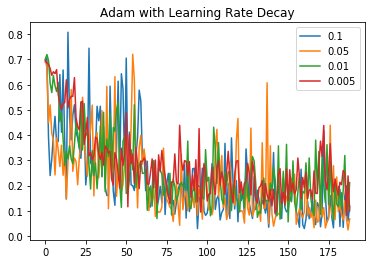

In [726]:
plt.plot(Adam_decay_dict['0.1'], label='0.1')
plt.plot(Adam_decay_dict['0.05'], label='0.05')
plt.plot(Adam_decay_dict['0.01'], label='0.01')
plt.plot(Adam_decay_dict['0.005'], label='0.005')
# plt.ylim(0,2)
plt.title('Adam with Learning Rate Decay')
plt.legend()
plt.show()

## Cases

In [ ]:
val_dataset = IMDBDataset(validation_data_indices, validation_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

model = BagOfNGram(len(id2token), emb_dim)
lr=[0.01]
num_epochs = 3
criterion = torch.nn.CrossEntropyLoss()  

def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    failed_examples = []
    succeed_examples = []
    correct = 0
    total = 0
    model.eval()
    num = 0
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        pred_result = predicted.eq(labels.view_as(predicted)).sum().item()
#         if predicted[0] == 0 and len(failed_examples) < 3:
#             failed_examples.append(num)
#         if predicted[0] == 1 and len(succeed_examples) < 3:
#             succeed_examples.append(num)
        correct += pred_result
        
#         num += 1
        
        
#     print('Failed: ', failed_examples)
#     print('Succeed: ', succeed_examples)

        print ('predicted: {}'.format(predicted))
        print ('labels: {}'.format(labels.view_as(predicted)))
        break
    return (100 * correct / total)





for lr in lr_list:
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)
    for epoch in range(num_epochs):
        scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
                
                

In [442]:
print ('Example 1: {}'.format(validation_data[0]))
# print (validation_targets[0])
print ('Example 2: {}'.format(validation_data[1]))
# print (validation_targets[1])
print ('Example 3: {}'.format(validation_data[2]))
# print (validation_targets[2])

Example 1: there are enough sad stories about women and their oppression by religious, political and societal means. not to diminish the films and stories about genital mutilation and reproductive rights, as well as wage inequality, and marginalization in society, all in the name of allah or god or some other ridiculous justification, but sometimes it is helpful to just take another approach and shed some light on the subject.the setting is the 2006 match between iran and bahrain to qualify for the world cup. passions are high and several women try to disguise themselves as men to get into the match.the women who were caught (played by sima mobarak-shahi, shayesteh irani, ayda sadeqi, golnaz farmani, and mahnaz zabihi) and detained for prosecution provided a funny and illuminating glimpse into the customs of this country and, most likely, all muslim countries. their interaction with the iranian soldiers who were guarding and transporting them, both city and villagers, and the father wh

In [445]:
print ('Example 1: {}'.format(validation_data[8]))
# print (validation_targets[8])
print ('Example 2: {}'.format(validation_data[12]))
# print (validation_targets[12])
print ('Example 3: {}'.format(validation_data[14]))
# print (validation_targets[14])

Example 1: twisted desire (1996) was a tv movie starring melissa joan hart. melissa's character, jennifer stanton, a seventeen-year-old seduces her current boyfriend nick ryan into murdering her two parents. the movie is based on the 1990 murders of the parents of 14 year old jessica wiseman. jessica had her 17 year old boyfriend douglas christopher thomas shoot and kill her parents! thomas was executed in 2000! jessica was released from prison when she turned 21 years old. evidence now suggests that it was jessica who fired the fatal shot that killed her mother. jessica is known to now be residing somewhere in the state of virginia.
Example 2: i once lived with a roommate who attempted suicide, and our apartment was in a building where you could get a fifty dollar noise violation for sneezing after midnight - so, needless to say, i can easily relate to polanski's "the tenant." but i also enjoy the film for other reasons. i'm not sure that it works, on the whole - the polanski characte

## Tokenization

In [735]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer("english")
def tokenize(sent):
    token_list = []
    tokens = word_tokenize(sent)
    for token in tokens:
        token_list.append(stemmer.stem(token))
    return [token.lower() for token in token_list if (token not in punctuations)]


# Example
tokens = tokenize(train_data[a])
print (tokens)

['this', 'is', 'a', 'truli', 'wretch', 'littl', 'film', 'admit', 'the', 'origin', 'un', 'holi', 'triniti', 'was', 'govern', 'by', 'the', 'law', 'of', 'diminish', 'return', 'with', 'the', 'third', '``', 'the', 'final', 'conflict', "''", 'degener', 'into', 'a', 'ridicul', 'sub-plot', 'about', 'half-way', 'through', 'the', 'film', 'appar', 'mere', 'to', 'provid', 'the', 'requisit', 'needless', 'convolut', 'death', 'that', 'had', 'by', 'now', 'becom', 'the', 'whole', 'raison', "d'etr", 'for', 'the', '``', 'omen', "''", 'seri', 'but', 'then', 'to', 'foist', 'this', 'jumped-up', 'tv', 'movi', 'bewar', 'purchas', 'of', 'the', 'omen', 'box', 'set', 'on', 'dvd', 'do', "n't", 'be', 'fool', 'by', 'the', 'widescreen', 'ratio', 'of', 'the', 'transfer', 'this', 'was', 'and', 'is', 'strict', 'small-screen', 'stuff', 'on', 'the', 'back', 'of', 'a', 'seri', 'of', 'general', 'fine', 'demon', 'chiller', 'was', 'unforgiv', 'particular', 'endors', 'as', 'it', 'was', 'by', 'the', 'exec.produc', 'and', 'prod

In [539]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 
def tokenize(sent):
#     token_list = []
    tokens = word_tokenize(sent)
    for token in tokens:
        token_list = [w for w in tokens if not w in stop_words]
    return [token.lower() for token in token_list if (token not in punctuations)]


In [737]:
def find_ngrams(input_list, n): #input_list is a list of single tokens
    result = []
    result += list(zip(*[input_list[j:] for j in range(n)]))
    return result

def tokenize_dataset(dataset, n):
    token_dataset = []
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        ngrams = find_ngrams(tokens,n)
        new_tokens = [" ".join(list(i)) for i in ngrams]
        token_dataset.append(new_tokens)
        all_tokens += new_tokens

    return token_dataset, all_tokens

n = 1

print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data,n)
pkl.dump(all_train_tokens, open("nltk_all_train_tokens_" + str(n) + ".p", "wb"))
pkl.dump(train_data_tokens, open("nltk_train_data_tokens_" + str(n) + ".p", "wb"))

print ("Tokenizing validation data")
validation_data_tokens, _ = tokenize_dataset(validation_data,n)
pkl.dump(validation_data_tokens, open("nltk_validation_data_tokens_" + str(n) + ".p", "wb"))

print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data,n)
pkl.dump(test_data_tokens, open("nltk_test_data_tokens_" + str(n) + ".p", "wb"))

Tokenizing train data
Tokenizing validation data
Tokenizing test data


In [743]:
n = 1

train_data_tokens = pkl.load(open("stop_train_data_tokens_" + str(n) + ".p", "rb"))
all_train_tokens = pkl.load(open("stop_all_train_tokens_" + str(n) + ".p", "rb"))
validation_data_tokens = pkl.load(open("stop_validation_data_tokens_" + str(n) + ".p", "rb"))
test_data_tokens = pkl.load(open("stop_test_data_tokens_" + str(n) + ".p", "rb"))

In [744]:
BATCH_SIZE = 32
emb_dim = 100 # dimension for n-gram embedding
learning_rate = 0.01 #with decay
num_epochs = 3 # number of epochs to train
max_vocab_size = 10000

In [745]:
from collections import Counter
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
validation_data_indices = token2index_dataset(validation_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

class IMDBDataset(Dataset):
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

    
MAX_SENTENCE_LENGTH = 250   
    
def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(validation_data_indices, validation_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

class BagOfNGram(nn.Module):
    """
    BagOfNGram classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfNGram, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

model = BagOfNGram(len(id2token), emb_dim)

In [746]:
model = BagOfNGram(len(id2token), emb_dim)
token_loss_stop=[]
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)


for epoch in range(num_epochs):
    scheduler.step()
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        if i % 10 ==0:
            token_loss_stop.append(loss.data[0])
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: [1/3], Step: [101/625], Validation Acc: 83.24
Epoch: [1/3], Step: [201/625], Validation Acc: 86.4
Epoch: [1/3], Step: [301/625], Validation Acc: 86.98
Epoch: [1/3], Step: [401/625], Validation Acc: 86.8
Epoch: [1/3], Step: [501/625], Validation Acc: 87.66
Epoch: [1/3], Step: [601/625], Validation Acc: 88.16
Epoch: [2/3], Step: [101/625], Validation Acc: 88.32
Epoch: [2/3], Step: [201/625], Validation Acc: 88.6
Epoch: [2/3], Step: [301/625], Validation Acc: 88.52
Epoch: [2/3], Step: [401/625], Validation Acc: 88.84
Epoch: [2/3], Step: [501/625], Validation Acc: 88.74
Epoch: [2/3], Step: [601/625], Validation Acc: 88.82
Epoch: [3/3], Step: [101/625], Validation Acc: 88.72
Epoch: [3/3], Step: [201/625], Validation Acc: 88.72
Epoch: [3/3], Step: [301/625], Validation Acc: 88.72
Epoch: [3/3], Step: [401/625], Validation Acc: 88.74
Epoch: [3/3], Step: [501/625], Validation Acc: 88.68
Epoch: [3/3], Step: [601/625], Validation Acc: 88.74


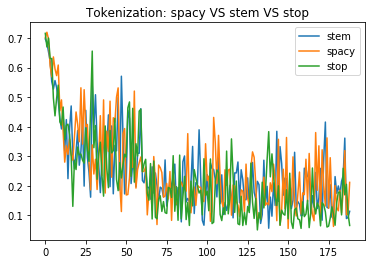

In [750]:
plt.plot(token_loss,label = 'stem')
plt.plot(Adam_decay_dict['0.01'], label='spacy')
plt.plot(token_loss_stop,label = 'stop')
plt.title('Tokenization: spacy VS stem VS stop')
plt.legend()
plt.show()


## Final Test

Please see the separete file.

## Prediction to a scale of 1-10

In [751]:
def read_file(file_name):
    with open(file_name, "r") as f:
        content = f.read()
        content = content.lower().replace("<br />", "")
    return content

def load_dataset(dataset_dir, dataset_size, initial=0):
    pos_dir = os.path.join(dataset_dir, "pos")
    neg_dir = os.path.join(dataset_dir, "neg")
    single_label_size = int(dataset_size / 2)
    dataset = []
    target = []
    all_pos = os.listdir(pos_dir)
    all_neg = os.listdir(neg_dir)
    for i in range(initial, initial+single_label_size):
        dataset.append(read_file(os.path.join(pos_dir, all_pos[i])))
        target.append(int(all_pos[i].split('.')[0].split('_')[1])-1)
        dataset.append(read_file(os.path.join(neg_dir, all_neg[i])))
        target.append(int(all_neg[i].split('.')[0].split('_')[1])-1)
    return dataset, target

In [752]:
pos_dir = os.path.join(train_dir, "pos")
variable = os.listdir(pos_dir)
int(variable[10].split('.')[0].split('_')[1])

10

In [753]:
train_targets = load_dataset(train_dir, TRAIN_SIZE)[1]
validation_targets = load_dataset(train_dir, VALIDATION_SIZE, initial=int(TRAIN_SIZE/2))[1]
test_targets = load_dataset(test_dir, TEST_SIZE)[1]


In [754]:
import numpy as np
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of IMDB tokens 
        @param target_list: list of IMDB targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

    
MAX_SENTENCE_LENGTH = 250   
    
def IMDB_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

train_dataset = IMDBDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

val_dataset = IMDBDataset(validation_data_indices, validation_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=True)

test_dataset = IMDBDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=IMDB_collate_func,
                                           shuffle=False)

class BagOfNGram(nn.Module):
    """
    BagOfNGram classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfNGram, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear1 = nn.Linear(emb_dim, 32)
        self.linear2 = nn.Linear(32, 10)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
        
        # return logits
        out = self.linear1(out.float())
#         out = self.dropout(out.float())
        out = self.sigmoid(out.float())
        out = self.linear2(out.float())
        
        return out

In [762]:
loss_scale = []
model = BagOfNGram(len(id2token), emb_dim)
lr_list = [0.01]
num_epochs = 10
criterion = torch.nn.CrossEntropyLoss() 

def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for lr in lr_list:
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.8)
    for epoch in range(num_epochs):
        scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
#             label_batch = label_batch.type(torch.FloatTensor)
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            if i%10 == 0:
                loss_scale.append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 600 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Lr: {}, Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format(lr, 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))

Lr: 0.01, Epoch: [1/10], Step: [601/625], Validation Acc: 41.5
Lr: 0.01, Epoch: [2/10], Step: [601/625], Validation Acc: 41.74
Lr: 0.01, Epoch: [3/10], Step: [601/625], Validation Acc: 40.92
Lr: 0.01, Epoch: [4/10], Step: [601/625], Validation Acc: 40.12
Lr: 0.01, Epoch: [5/10], Step: [601/625], Validation Acc: 39.84
Lr: 0.01, Epoch: [6/10], Step: [601/625], Validation Acc: 38.88
Lr: 0.01, Epoch: [7/10], Step: [601/625], Validation Acc: 37.62
Lr: 0.01, Epoch: [8/10], Step: [601/625], Validation Acc: 38.06
Lr: 0.01, Epoch: [9/10], Step: [601/625], Validation Acc: 37.8
Lr: 0.01, Epoch: [10/10], Step: [601/625], Validation Acc: 37.5


In [ ]:
plt.plot(loss_scale)

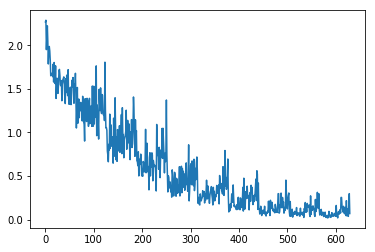

In [282]:
plt.plot(loss_scale)

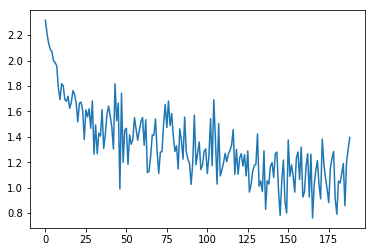

In [760]:
#with 15 epochs
plt.plot(loss_scale)

In [761]:
print ("After training for {} epochs".format(num_epochs))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 3 epochs
Test Acc 39.492


## graphs

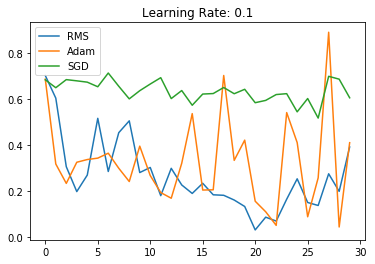

In [730]:
plt.plot(RMS_dict['0.1'], label='RMS')
plt.plot(Adam_dict['0.1'], label='Adam')
plt.plot(SGD_dict['0.1'], label='SGD')
plt.title('Learning Rate: 0.1')
plt.legend()
plt.show()

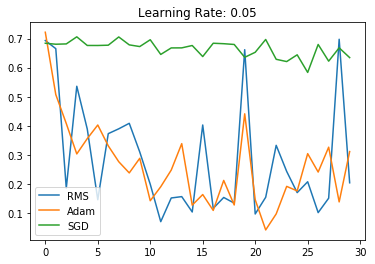

In [731]:
plt.plot(RMS_dict['0.05'], label='RMS')
plt.plot(Adam_dict['0.05'], label='Adam')
plt.plot(SGD_dict['0.05'], label='SGD')
plt.title('Learning Rate: 0.05')
plt.legend()
plt.show()

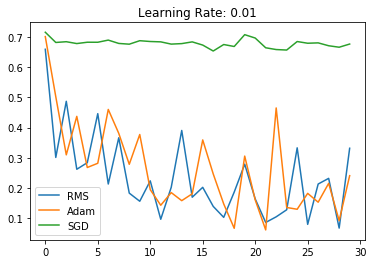

In [732]:
plt.plot(RMS_dict['0.01'], label='RMS')
plt.plot(Adam_dict['0.01'], label='Adam')
plt.plot(SGD_dict['0.01'], label='SGD')
plt.title('Learning Rate: 0.01')
plt.legend()
plt.show()

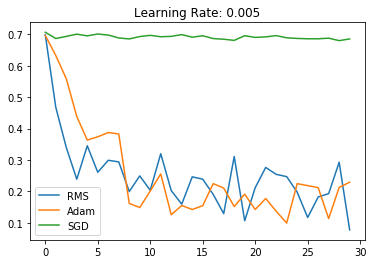

In [733]:
plt.plot(RMS_dict['0.005'], label='RMS')
plt.plot(Adam_dict['0.005'], label='Adam')
plt.plot(SGD_dict['0.005'], label='SGD')
plt.title('Learning Rate: 0.005')
plt.legend()
plt.show()